In [50]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import scipy.stats as stats
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

In [2]:
smoke_df = pd.read_csv('smoke_detection_iot.csv',index_col=0)
smoke_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62630 entries, 0 to 62629
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   UTC             62630 non-null  int64  
 1   Temperature[C]  62630 non-null  float64
 2   Humidity[%]     62630 non-null  float64
 3   TVOC[ppb]       62630 non-null  int64  
 4   eCO2[ppm]       62630 non-null  int64  
 5   Raw H2          62630 non-null  int64  
 6   Raw Ethanol     62630 non-null  int64  
 7   Pressure[hPa]   62630 non-null  float64
 8   PM1.0           62630 non-null  float64
 9   PM2.5           62630 non-null  float64
 10  NC0.5           62630 non-null  float64
 11  NC1.0           62630 non-null  float64
 12  NC2.5           62630 non-null  float64
 13  CNT             62630 non-null  int64  
 14  Fire Alarm      62630 non-null  int64  
dtypes: float64(8), int64(7)
memory usage: 7.6 MB


<AxesSubplot:>

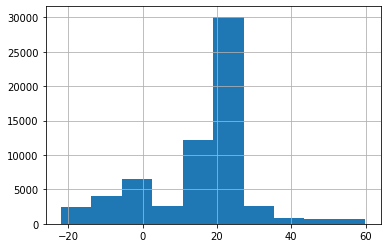

In [3]:
smoke_df['Temperature[C]'].hist()

In [4]:
selected_columns = smoke_df.iloc[:, 0:14]

X = selected_columns.copy()
X

,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT
0,1654733331,20.000,57.36,0,400,12306,18520,939.735,0.00,0.00,0.00,0.000,0.000,0
1,1654733332,20.015,56.67,0,400,12345,18651,939.744,0.00,0.00,0.00,0.000,0.000,1
2,1654733333,20.029,55.96,0,400,12374,18764,939.738,0.00,0.00,0.00,0.000,0.000,2
3,1654733334,20.044,55.28,0,400,12390,18849,939.736,0.00,0.00,0.00,0.000,0.000,3
4,1654733335,20.059,54.69,0,400,12403,18921,939.744,0.00,0.00,0.00,0.000,0.000,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62625,1655130047,18.438,15.79,625,400,13723,20569,936.670,0.63,0.65,4.32,0.673,0.015,5739
62626,1655130048,18.653,15.87,612,400,13731,20588,936.678,0.61,0.63,4.18,0.652,0.015,5740
62627,1655130049,18.867,15.84,627,400,13725,20582,936.687,0.57,0.60,3.95,0.617,0.014,5741
62628,1655130050,19.083,16.04,638,400,13712,20566,936.680,0.57,0.59,3.92,0.611,0.014,5742


In [5]:
X = StandardScaler().fit_transform(X)
X

array([[-0.53394841,  0.28062169,  0.99494707, ..., -0.09192422,
        -0.07388861, -1.38347572],
       [-0.53393932,  0.2816663 ,  0.91711549, ..., -0.09192422,
        -0.07388861, -1.38334411],
       [-0.53393022,  0.28264127,  0.83702792, ..., -0.09192422,
        -0.07388861, -1.38321249],
       ...,
       [ 3.07252608,  0.20171901, -3.68848353, ..., -0.09164563,
        -0.07387569, -0.62786328],
       [ 3.07253518,  0.21676136, -3.66592365, ..., -0.09164834,
        -0.07387569, -0.62773167],
       [ 3.07254427,  0.23180371, -3.61177995, ..., -0.09165014,
        -0.07387569, -0.62760005]])

In [35]:
y = np.asanyarray(smoke_df['Fire Alarm'])
y

array([0, 0, 0, ..., 0, 0, 0])

In [36]:
# X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.30, random_state=5)
X_train, X_test, y_train, y_test = train_test_split(X, y,
    test_size=0.2, shuffle = True, random_state = 8)

# Use the same function above for the validation set
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, 
    test_size=0.25, random_state= 8) # 0.25 x 0.8 = 0.2



In [69]:
model = XGBClassifier(learning_rate = 0.01).fit(X_train, y_train)
y_hat = model.predict(X_val)
print(accuracy_score(y_val,y_hat))


0.9996806642184257


In [70]:
y_hat = model.predict(X_test)
accur = accuracy_score(y_pred=y_hat, y_true=y_test)
accur

0.9994411623822449

In [71]:
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score


In [72]:
print(jaccard_score(y_pred=y_hat, y_true = y_test))

0.9992158619917105


In [73]:
f1_score(y_test,y_hat,average='macro')

0.9993181148405132